Goal: Generate 2D descriptors of the molecules in the smiles strings

In [1]:
# Read in 1000 molecule csv
import pandas as pd
import numpy as np

In [2]:
# Check to make sure everything imported correctly
sample_mols_df = pd.read_csv('rdf_sampled_dirads.csv')
sample_mols_df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'rdf_sampled_dirads.csv'

In [ ]:
# Pick 10 strings from the 1000 randomly sampled
subset = sample_mols_df.sample(n=10)
subset

In [54]:
# Save the 10 sampled to a csv so that they are not randomly sampled everytime the code runs
subset.to_csv('sampled_mols.csv')

In [2]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

In [3]:
# Make sure the sampled mols are looking right
sampled_mols_df = pd.read_csv('sampled_mols.csv')
sampled_mols_df

,Unnamed: 0.1,Unnamed: 0,rid,molecule,bond_index,fragment1,fragment2,bde,bdfe,bdscfe,cart,conj
0,2135,451102,NaN,CSCCC1OCCO1,8,CSCC[CH]OCC[O],NaN,82.610305,79.514803,86.575422,4.734607,9999
1,6489,209533,NaN,CCC(=O)C1(O)CCCC1,8,[CH2]CCC([CH2])(O)C(=O)CC,NaN,80.488069,76.234186,85.476282,5.002763,9999
2,4688,311598,NaN,C1=CC12OCCO2,3,[CH2]COC1([O])C=C1,NaN,67.604055,63.514578,72.195599,4.101081,9999
3,515,1502984,NaN,NC1=NC[C@H](C(=O)O)N1,7,[NH]C(N)=NC[CH]C(=O)O,NaN,67.860078,65.692035,71.459339,4.325361,9999
4,4629,192445,NaN,O=c1c2c(c1=O)CC=CC2,5,[CH2]C=CCc1[c]c(=O)c1=O,NaN,91.872965,88.053945,95.023589,5.544240,9999
5,4567,301053,NaN,CCN1CCCNC1=O,4,[CH2]CN(CC)C(=O)N[CH2],NaN,80.371980,76.435616,85.134358,4.353713,9999
6,5566,266177,NaN,C=CS(=O)(=O)NC1COC1,7,[CH2]C(C[O])NS(=O)(=O)C=C,NaN,58.913055,56.574329,62.861593,3.000856,9999
7,6741,357147,NaN,C/C=C/CN1CCOCC1,8,[CH2]OCCN([CH2])C/C=C/C,NaN,79.390556,74.471513,82.904691,5.211926,9999
8,5540,251121,NaN,CCN1CC[C@@H](O)C1,2,[CH2]C[C@@H](O)C[N]CC,NaN,71.628897,67.071927,75.985841,4.920386,9999
9,6222,393180,NaN,CCO/C=C1/C=CCCC1,4,[CH]=CCCC[C]=COCC,NaN,110.724591,107.143397,114.063749,5.285669,9999


In [4]:
# Generating the 2D descriptors for the
class RDKit_2D:
    def __init__(self, smiles):
        self.mols = [Chem.MolFromSmiles(i) for i in smiles]
        self.smiles = smiles
        
    def compute_2Drdkit(self, name):
        rdkit_2D_desc = []
        calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
        header = calc.GetDescriptorNames()
        for i in range(len(self.mols)):
            ds = calc.CalcDescriptors(self.mols[i])
            rdkit_2D_desc.append(ds)
        df = pd.DataFrame(rdkit_2D_desc, columns = header)
        df.insert(loc = 0, column = 'smiles', value = self.smiles)
        df.to_csv(name[:-4]+'_RDKit_2D.csv', index = False)

In [5]:
# List of all the 2D descriptors created by RDKit
descriptors_list = [x[0] for x in Descriptors._descList]
print(descriptors_list)

['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'Slo

In [6]:
# Call for the entire list of 2D descriptors
calc = MoleculeDescriptors.MolecularDescriptorCalculator([x [0] for x in Descriptors._descList])
calc

In [7]:
# Create header for the output of the molecular descriptors
header = calc.GetDescriptorNames()
header

('MaxEStateIndex',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_

In [8]:
# Compute the descriptors for one SMILES string to ensure code above is working correctly
mol = Chem.MolFromSmiles('CC[C@]1(C(=O)O)CCO1')
ds = calc.CalcDescriptors(mol)
print(ds)

(10.409583333333334, -0.8229166666666667, 10.409583333333334, 0.5717592592592592, 0.5962602563502525, 130.14299999999997, 120.06299999999997, 130.06299418, 52, 0, 0.33554596669446907, -0.4791056629297487, 0.4791056629297487, 0.33554596669446907, 1.8888888888888888, 2.4444444444444446, 2.4444444444444446, 16.547737291094627, 9.921513033095788, 2.436219689382986, -2.3618651124224446, 2.2906249665455847, -2.4956855600690933, 5.7775878535582175, -0.1942021352442073, 2.56829198106863, 120.75488750216347, 6.905777393935817, 5.3850305199873265, 5.3850305199873265, 4.211142625940433, 3.0847437851817503, 3.0847437851817503, 2.251458265335147, 2.251458265335147, 1.8451317680504684, 1.8451317680504684, 0.9471965851081656, 0.9471965851081656, -0.5700000000000001, 73.06242953469413, 6.548623962040332, 1.9882386060247925, 0.8115463822431909, 53.62743152803001, 9.843390348640755, 0.0, 5.601050810983688, 0.0, 0.0, 5.969305287951849, 0.0, 4.794537184071822, 0.0, 0.0, 6.923737199690624, 6.42082162292600

In [9]:
# Now iterate for all the mols and organize them into pandas dataframe
def compute_2Drdkit(self, name):
    rdkit_2d_desc = []
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    header = calc.GetDescriptorNames()
    for i in range(len(self.mols)):
        ds = calc.CalcDescriptors(self.mols[i])
        rdkit_2d_desc.append(ds)
    df = pd.DataFrame(rdkit_2d_desc, columns=header)
    df.insert(loc = 0, column = 'smiles', value = self.smiles)
    df.to_csv(name[:-4]+'_RDKit_2D.csv', index = False)

In [10]:
from molvs import standardize_smiles

In [11]:
# Now import and use the class to compute the RDKit 2D descriptors
# They will save as their own csv to be uploaded
def main():
    filename = 'sampled_mols.csv'
    df = pd.read_csv('sampled_mols.csv')
    smiles = [standardize_smiles(i) for i in df['molecule'].values]
    
    # Compute RDKit_2D Fingerprints and export a csv file
    RDKit_descriptor = RDKit_2D(smiles)
    RDKit_descriptor.compute_2Drdkit('sampled_mols.csv')
    
if __name__ =='__main__':
    main()

### Now we want to merge the two dataframes with the smiles and the descriptors (use inner join)

In [12]:
dirads = pd.read_csv('rdf_sampled_dirads_df.csv') 
parents = pd.read_csv('rdf_parent_desc.csv')     

In [13]:
descriptors = [dirads, parents]
result = pd.concat(descriptors)

In [14]:
dirads

,Unnamed: 0,rid,molecule,bond_index,fragment1,fragment2,bde,bdfe,bdscfe,cart,conj
0,319292,NaN,CC(C)N1CCOC1=O,3,[CH2]COC(=O)[N]C(C)C,NaN,85.259020,80.915403,89.557518,4.593091,9999
1,267257,NaN,CC(C)[C@@H](C)SC1COC1,7,[CH2]C(C[O])S[C@H](C)C(C)C,NaN,58.543452,57.581481,62.370026,3.701196,9999
2,253493,NaN,CCC1=CNCCC1,7,[CH2]CCNC=[C]CC,NaN,97.037992,91.984662,100.944869,5.107230,9999
3,192932,NaN,c1nnc2n1CCCCC2,5,[CH2]CCCc1nncn1[CH2],NaN,81.884277,76.576806,86.934183,5.370440,9999
4,323812,NaN,O=C1CC[C@H](CO)O1,2,[CH2]C(=O)O[C@H]([CH2])CO,NaN,79.525471,76.566766,83.731931,4.610139,9999
...,...,...,...,...,...,...,...,...,...,...,...
9995,296557,NaN,C[C@@H]1CN2CC[C@@H]1O2,5,[CH2]CN1C[C@@H](C)[CH]O1,NaN,76.236696,72.335472,80.380980,4.179693,9999
9996,276237,NaN,CSC[C@H]1CCC[C@@H](C)C1,8,[CH2][C@H](CCC[CH]C)CSC,NaN,86.507136,80.937993,91.039056,6.338257,9999
9997,317679,NaN,N[C@@H]1CCO[C@@H]1O,1,[CH2]CO[C@H](O)[CH]N,NaN,75.934864,72.090116,79.830818,4.676913,9999
9998,360951,NaN,C[C@@H]1CCC(=O)OC1,7,[CH2]OC(=O)CC[CH]C,NaN,77.233180,72.222521,81.584260,5.156724,9999


In [15]:
parents

,smiles,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC(C)N1CCOC1=O,10.719444,-0.175926,10.719444,0.175926,0.524873,129.159,118.071,129.078979,52,...,0,0,0,0,0,0,0,0,0,0
1,CC(C)[C@@H](C)SC1COC1,5.094650,0.786019,5.094650,0.786019,0.625460,160.282,144.154,160.092186,60,...,1,0,0,0,0,0,0,0,0,0
2,CCC1=CNCCC1,3.223704,1.170139,3.223704,1.170139,0.542358,111.188,98.084,111.104799,46,...,0,0,0,0,0,0,0,0,0,0
3,c1nnc2n1CCCCC2,4.029722,1.111111,4.029722,1.111111,0.533848,137.186,126.098,137.095297,54,...,0,0,0,0,0,0,0,0,0,0
4,O=C1CC[C@H](CO)O1,10.279028,-0.219907,10.279028,0.035972,0.477612,116.116,108.052,116.047344,46,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,C[C@@H]1CN2CC[C@@H]1O2,5.417824,0.564815,5.417824,0.564815,0.456866,113.160,102.072,113.084064,46,...,0,0,0,0,0,0,0,0,0,0
9996,CSC[C@H]1CCC[C@@H](C)C1,2.395324,1.005463,2.395324,1.005463,0.594564,158.310,140.166,158.112922,60,...,1,0,0,0,0,0,0,0,0,0
9997,N[C@@H]1CCO[C@@H]1O,8.650463,-0.708333,8.650463,0.152778,0.415441,103.121,94.049,103.063329,42,...,0,0,0,0,0,0,0,0,0,0
9998,C[C@@H]1CCC(=O)OC1,10.386389,-0.038796,10.386389,0.038796,0.438294,114.144,104.064,114.068080,46,...,0,0,0,0,0,0,0,0,0,0


In [16]:
parents.rename(columns={'smiles':'molecule'}, inplace=True)

In [17]:
parents = parents.merge(dirads, on='molecule', how='left')

In [18]:
parents.to_csv('rdf_sampled_with_desc.csv', index=False)

### Now it's time to make a random forest 

In [19]:
rdf_desc = pd.read_csv('rdf_sampled_with_desc.csv')
rdf_desc

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_9854/2135383576.py:1: DtypeWarning: Columns (213) have mixed types. Specify dtype option on import or set low_memory=False.
  rdf_desc = pd.read_csv('rdf_sampled_with_desc.csv')


,molecule,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,Unnamed: 0,rid,bond_index,fragment1,fragment2,bde,bdfe,bdscfe,cart,conj
0,CC(C)N1CCOC1=O,10.719444,-0.175926,10.719444,0.175926,0.524873,129.159,118.071,129.078979,52,...,319292,NaN,3,[CH2]COC(=O)[N]C(C)C,NaN,85.259020,80.915403,89.557518,4.593091,9999
1,CC(C)[C@@H](C)SC1COC1,5.094650,0.786019,5.094650,0.786019,0.625460,160.282,144.154,160.092186,60,...,267257,NaN,7,[CH2]C(C[O])S[C@H](C)C(C)C,NaN,58.543452,57.581481,62.370026,3.701196,9999
2,CCC1=CNCCC1,3.223704,1.170139,3.223704,1.170139,0.542358,111.188,98.084,111.104799,46,...,253493,NaN,7,[CH2]CCNC=[C]CC,NaN,97.037992,91.984662,100.944869,5.107230,9999
3,CCC1=CNCCC1,3.223704,1.170139,3.223704,1.170139,0.542358,111.188,98.084,111.104799,46,...,213889,NaN,4,[CH2]CCC(=C[NH])CC,NaN,66.383550,61.883683,70.311311,4.428669,9999
4,CCC1=CNCCC1,3.223704,1.170139,3.223704,1.170139,0.542358,111.188,98.084,111.104799,46,...,393113,NaN,3,[CH]=C(CC)CCC[NH],NaN,96.741808,92.954163,100.804745,5.073219,9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14419,CSC[C@H]1CCC[C@@H](C)C1,2.395324,1.005463,2.395324,1.005463,0.594564,158.310,140.166,158.112922,60,...,276237,NaN,8,[CH2][C@H](CCC[CH]C)CSC,NaN,86.507136,80.937993,91.039056,6.338257,9999
14420,N[C@@H]1CCO[C@@H]1O,8.650463,-0.708333,8.650463,0.152778,0.415441,103.121,94.049,103.063329,42,...,317679,NaN,1,[CH2]CO[C@H](O)[CH]N,NaN,75.934864,72.090116,79.830818,4.676913,9999
14421,C[C@@H]1CCC(=O)OC1,10.386389,-0.038796,10.386389,0.038796,0.438294,114.144,104.064,114.068080,46,...,276752,NaN,6,[CH2][C@H](C)CCC([O])=O,NaN,85.413388,80.867085,89.604846,6.055404,9999
14422,C[C@@H]1CCC(=O)OC1,10.386389,-0.038796,10.386389,0.038796,0.438294,114.144,104.064,114.068080,46,...,360951,NaN,7,[CH2]OC(=O)CC[CH]C,NaN,77.233180,72.222521,81.584260,5.156724,9999


In [20]:
rdf_desc.drop(columns=['molecule', 'fragment1', 'fragment2', 'rid'], axis = 1, inplace=True)
rdf_desc

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_thiophene,fr_unbrch_alkane,fr_urea,Unnamed: 0,bond_index,bde,bdfe,bdscfe,cart,conj
0,10.719444,-0.175926,10.719444,0.175926,0.524873,129.159,118.071,129.078979,52,0,...,0,0,0,319292,3,85.259020,80.915403,89.557518,4.593091,9999
1,5.094650,0.786019,5.094650,0.786019,0.625460,160.282,144.154,160.092186,60,0,...,0,0,0,267257,7,58.543452,57.581481,62.370026,3.701196,9999
2,3.223704,1.170139,3.223704,1.170139,0.542358,111.188,98.084,111.104799,46,0,...,0,0,0,253493,7,97.037992,91.984662,100.944869,5.107230,9999
3,3.223704,1.170139,3.223704,1.170139,0.542358,111.188,98.084,111.104799,46,0,...,0,0,0,213889,4,66.383550,61.883683,70.311311,4.428669,9999
4,3.223704,1.170139,3.223704,1.170139,0.542358,111.188,98.084,111.104799,46,0,...,0,0,0,393113,3,96.741808,92.954163,100.804745,5.073219,9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14419,2.395324,1.005463,2.395324,1.005463,0.594564,158.310,140.166,158.112922,60,0,...,0,0,0,276237,8,86.507136,80.937993,91.039056,6.338257,9999
14420,8.650463,-0.708333,8.650463,0.152778,0.415441,103.121,94.049,103.063329,42,0,...,0,0,0,317679,1,75.934864,72.090116,79.830818,4.676913,9999
14421,10.386389,-0.038796,10.386389,0.038796,0.438294,114.144,104.064,114.068080,46,0,...,0,0,0,276752,6,85.413388,80.867085,89.604846,6.055404,9999
14422,10.386389,-0.038796,10.386389,0.038796,0.438294,114.144,104.064,114.068080,46,0,...,0,0,0,360951,7,77.233180,72.222521,81.584260,5.156724,9999


In [21]:
rdf_desc

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_thiophene,fr_unbrch_alkane,fr_urea,Unnamed: 0,bond_index,bde,bdfe,bdscfe,cart,conj
0,10.719444,-0.175926,10.719444,0.175926,0.524873,129.159,118.071,129.078979,52,0,...,0,0,0,319292,3,85.259020,80.915403,89.557518,4.593091,9999
1,5.094650,0.786019,5.094650,0.786019,0.625460,160.282,144.154,160.092186,60,0,...,0,0,0,267257,7,58.543452,57.581481,62.370026,3.701196,9999
2,3.223704,1.170139,3.223704,1.170139,0.542358,111.188,98.084,111.104799,46,0,...,0,0,0,253493,7,97.037992,91.984662,100.944869,5.107230,9999
3,3.223704,1.170139,3.223704,1.170139,0.542358,111.188,98.084,111.104799,46,0,...,0,0,0,213889,4,66.383550,61.883683,70.311311,4.428669,9999
4,3.223704,1.170139,3.223704,1.170139,0.542358,111.188,98.084,111.104799,46,0,...,0,0,0,393113,3,96.741808,92.954163,100.804745,5.073219,9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14419,2.395324,1.005463,2.395324,1.005463,0.594564,158.310,140.166,158.112922,60,0,...,0,0,0,276237,8,86.507136,80.937993,91.039056,6.338257,9999
14420,8.650463,-0.708333,8.650463,0.152778,0.415441,103.121,94.049,103.063329,42,0,...,0,0,0,317679,1,75.934864,72.090116,79.830818,4.676913,9999
14421,10.386389,-0.038796,10.386389,0.038796,0.438294,114.144,104.064,114.068080,46,0,...,0,0,0,276752,6,85.413388,80.867085,89.604846,6.055404,9999
14422,10.386389,-0.038796,10.386389,0.038796,0.438294,114.144,104.064,114.068080,46,0,...,0,0,0,360951,7,77.233180,72.222521,81.584260,5.156724,9999


In [22]:
# Want to be able to call on the index as a value for the loop below
rdf_desc.index.name = 'key'
rdf_desc.rename_axis('key').rename_axis("Index", axis = 1)

Index,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_thiophene,fr_unbrch_alkane,fr_urea,Unnamed: 0,bond_index,bde,bdfe,bdscfe,cart,conj
key,,,,,,,,,,,,,,,,,,,,,
0,10.719444,-0.175926,10.719444,0.175926,0.524873,129.159,118.071,129.078979,52,0,...,0,0,0,319292,3,85.259020,80.915403,89.557518,4.593091,9999
1,5.094650,0.786019,5.094650,0.786019,0.625460,160.282,144.154,160.092186,60,0,...,0,0,0,267257,7,58.543452,57.581481,62.370026,3.701196,9999
2,3.223704,1.170139,3.223704,1.170139,0.542358,111.188,98.084,111.104799,46,0,...,0,0,0,253493,7,97.037992,91.984662,100.944869,5.107230,9999
3,3.223704,1.170139,3.223704,1.170139,0.542358,111.188,98.084,111.104799,46,0,...,0,0,0,213889,4,66.383550,61.883683,70.311311,4.428669,9999
4,3.223704,1.170139,3.223704,1.170139,0.542358,111.188,98.084,111.104799,46,0,...,0,0,0,393113,3,96.741808,92.954163,100.804745,5.073219,9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14419,2.395324,1.005463,2.395324,1.005463,0.594564,158.310,140.166,158.112922,60,0,...,0,0,0,276237,8,86.507136,80.937993,91.039056,6.338257,9999
14420,8.650463,-0.708333,8.650463,0.152778,0.415441,103.121,94.049,103.063329,42,0,...,0,0,0,317679,1,75.934864,72.090116,79.830818,4.676913,9999
14421,10.386389,-0.038796,10.386389,0.038796,0.438294,114.144,104.064,114.068080,46,0,...,0,0,0,276752,6,85.413388,80.867085,89.604846,6.055404,9999


In [23]:
# Labels are the values we want to predict
labels = np.array(rdf_desc['bde'])

# Remove the labels from the features
# axis 1 refers to the columns
features = rdf_desc.drop('bde', axis = 1)

# Saving the features name for later
feature_list = list(rdf_desc.columns)       

# Convert to numpy array
features = np.array(features)
features

array([[ 1.07194444e+01, -1.75925926e-01,  1.07194444e+01, ...,
         8.95575182e+01,  4.59309144e+00,  9.99900000e+03],
       [ 5.09465042e+00,  7.86018519e-01,  5.09465042e+00, ...,
         6.23700255e+01,  3.70119619e+00,  9.99900000e+03],
       [ 3.22370370e+00,  1.17013889e+00,  3.22370370e+00, ...,
         1.00944869e+02,  5.10722958e+00,  9.99900000e+03],
       ...,
       [ 1.03863889e+01, -3.87962963e-02,  1.03863889e+01, ...,
         8.96048462e+01,  6.05540431e+00,  9.99900000e+03],
       [ 1.03863889e+01, -3.87962963e-02,  1.03863889e+01, ...,
         8.15842596e+01,  5.15672362e+00,  9.99900000e+03],
       [ 5.41666667e+00, -2.22222222e-01,  5.41666667e+00, ...,
         8.48876528e+01,  4.04966599e+00,  9.99900000e+03]])

In [24]:
# Added the index to the feature list so it can be called on for calculations
feature_list.insert(0, 'Index')
feature_list

['Index',
 'MaxEStateIndex',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA

In [25]:
# Use Skicit-learn to split the data into training and test data
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [26]:
# Look at the shape of the data to make sure everything split correctly
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (10818, 214)
Training Labels Shape: (10818,)
Testing Features Shape: (3606, 214)
Testing Labels Shape: (3606,)


In [27]:
# Baseline predictions
baseline_preds = test_features[:, feature_list.index('Index')] 
                                                                  

# Baseline errors
baseline_errors = abs(baseline_preds - test_labels)     

print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  67.41


#### Could such a high average baseline error be produced because of all the descriptors or because the calc is wrong?

In [28]:
# Import the model being used
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model with n decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Train the model from the training data
rf.fit(train_features, train_labels);

In [29]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (MAE)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.31 degrees.


In [30]:
# Calculate the mean absolute percentage error
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

Accuracy: 99.65 %


#### Lets take one tree from the forest and save it as an image

In [36]:
feature_list.remove('Index')

In [37]:
feature_list.remove('Unnamed: 0')

In [38]:
# Import tools needed for visualization
import os
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]                       # Need to make the feature_names match feature_list. Drop index?

# Export image into a graph file
export_graphviz(tree, out_file = 'BDE_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create graph
(graph, ) = pydot.graph_from_dot_file('BDE_tree.dot')

# Write graph to png file
graph.write_png('BDE_tree.png')

In [39]:
# Limit the depth of the tree to 3 levels:
rf_small = RandomForestRegressor(n_estimators = 10, max_depth = 3)
rf_small.fit(train_features, train_labels)

# Extract the small tree as png
tree_small = rf_small.estimators_[5]

# Save tree as png
export_graphviz(tree_small, out_file = 'small_BDE_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_BDE_tree.dot')

graph.write_png('small_BDE_tree.png')



In [40]:
(graph) = pydot.graph_from_dot_file('small_BDE_tree.dot')
graph

In [41]:
# Get numerical feature importance
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out feature and importance
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: bdscfe               Importance: 0.82
Variable: bdfe                 Importance: 0.09
Variable: cart                 Importance: 0.05
Variable: BCUT2D_CHGLO         Importance: 0.01
Variable: NumAliphaticRings    Importance: 0.01
Variable: MaxEStateIndex       Importance: 0.0
Variable: MinEStateIndex       Importance: 0.0
Variable: MaxAbsEStateIndex    Importance: 0.0
Variable: MinAbsEStateIndex    Importance: 0.0
Variable: qed                  Importance: 0.0
Variable: MolWt                Importance: 0.0
Variable: HeavyAtomMolWt       Importance: 0.0
Variable: ExactMolWt           Importance: 0.0
Variable: NumValenceElectrons  Importance: 0.0
Variable: NumRadicalElectrons  Importance: 0.0
Variable: MaxPartialCharge     Importance: 0.0
Variable: MinPartialCharge     Importance: 0.0
Variable: MaxAbsPartialCharge  Importance: 0.0
Variable: MinAbsPartialCharge  Importance: 0.0
Variable: FpDensityMorgan1     Importance: 0.0
Variable: FpDensityMorgan2     Importance: 0.0
Variable

In [43]:
# New random forest with only the most important variables
rf_most_important = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Extract the most important features
important_indices = [feature_list.index('bdscfe'), feature_list.index('bdfe')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# Display performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%')

Mean Absolute Error: 0.28 degrees.
Accuracy: 99.63 %


#### Did the accuracy go down after I removed some of the descriptors? Should I add more estimators??

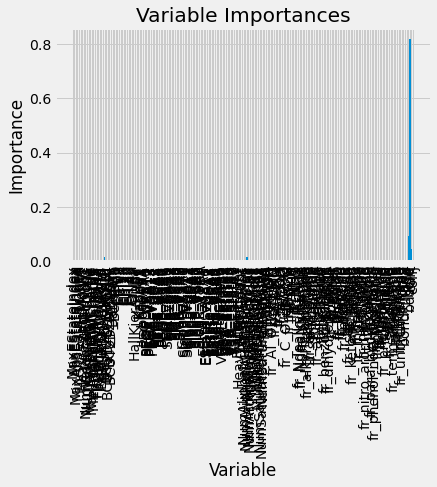

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# List of x locations for plotting
x_values = list(range(len(importances)))

plt.bar(x_values, importances, orientation = 'vertical')     # Gonna have to clean up this graph later :)

# Make a bar chart
plt.xticks(x_values, feature_list, rotation = 'vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

#### Plotting to determine outliers in the data or predictions will have to be tweaked, cannot use datetime for this data set